In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

In [2]:
from io import StringIO

#after testing replace StringIO(temp) to filename
df = pd.read_csv("STEP15_MOSFET_ID_VD_400um_x_20um.dat", delim_whitespace = True, header=37,
                 engine='python')

names = ['VD', 'ID', 'ID2', 'ID3', 'ID4','ID5','ID6','ID7','ID8']
df.columns = names

df = df.drop(index=94)
print(df)

                 VD               ID              ID2              ID3  \
0   3.50000000E-001  2.40550000E-005  5.52890000E-005  1.23200000E-004   
1   4.00000000E-001  2.52650000E-005  5.66640000E-005  1.24900000E-004   
2   4.50000000E-001  2.63150000E-005  5.78650000E-005  1.26350000E-004   
3   5.00000000E-001  2.72550000E-005  5.89140000E-005  1.27600000E-004   
4   5.50000000E-001  2.80850000E-005  5.98690000E-005  1.28750000E-004   
..              ...              ...              ...              ...   
89  4.80000000E+000  4.08090000E-005  7.50530000E-005  1.47950000E-004   
90  4.85000000E+000  4.08850000E-005  7.51500000E-005  1.48100000E-004   
91  4.90000000E+000  4.09650000E-005  7.52210000E-005  1.48150000E-004   
92  4.95000000E+000  4.10540000E-005  7.53250000E-005  1.48250000E-004   
93  5.00000000E+000  4.11590000E-005  7.54630000E-005  1.48500000E-004   

                ID4       ID5       ID6       ID7       ID8  
0   2.31500000E-004  0.000373  0.000531  0.000694

In [3]:
# activate Bokeh output in Jupyter notebook
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [ ]:
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

# Bokeh plot
plot = figure(x_axis_label='Micron (μm)', y_axis_label='Angstrom (Å)')

palette = Category10[10]
parsed_dataframes = df 

# Sample to skip
skip_sample = 0
skip_sample2 = 0
# Iterate over parsed_dataframes and plot each dataframe with a different color
# 66667 points
for i, df in enumerate(parsed_dataframes):
    # Skip plotting for a sample number (continue just skips values)

    x = df[df.columns[0]]
    y = df[df.columns[1]]
    
    # Use a color from the palette for each line
    color = palette[i % 10]
    plot.line(x, y, line_color=color, legend_label=f'Sample {i+3}')

# Show the plot
show(plot)

In [83]:
#df = df.astype({'VD':'float32', 'ID':'float32', 'ID2':'float32', 'ID3':'float32', 'ID4':'float32','ID5':'float32','ID6':'float32','ID7':'float32','ID8':'float32'})

### Plotter for ECE220 Resistance Values
Edit the functions to load the data.

Text(0.5, 1.0, 'TL Measurement at 30um Separation Before Sintering')

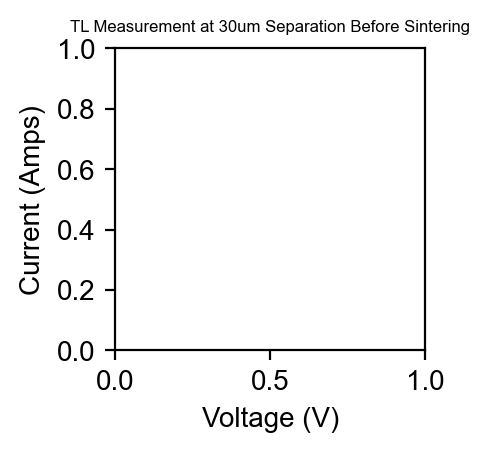

In [85]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(2,2), dpi=200)

plt.xlabel('Voltage (V)', fontsize=10)
plt.ylabel('Current (Amps)', fontsize=10)
plt.title('TL Measurement at 30um Separation Before Sintering', fontsize=6)


In [76]:
i = 0
maxn = 8
while i < maxn:
    if i == 0:
        print('Zero for ID is:' + str(df['ID'+str(i+1)][i]))
        i = i +1
        continue
    print('Zero for ID is:' + str(df['ID'+str(i+1)][i]))
    i = i +1

2.4055e-05
Zero for ID is:5.6664e-05
Zero for ID is:0.00012635
Zero for ID is:0.00023825
Zero for ID is:0.0003946
Zero for ID is:0.000595
Zero for ID is:0.00084037
Zero for ID is:0.00113


In [47]:
data

'VD'

In [45]:
for i, df in enumerate(data):
    x = df['VD']
    y = df['ID'+i]
    plt.plot(x,y,linewidth=0.5,zorder=1, label = "ID"+i)

TypeError: string indices must be integers

In [85]:
#DONE Make a resistance calculator using two points in that graph (or more), save to a csv, then plot said csv below
# V/I = R
checkpoint = []
data_list = ['TLM_IV_sinter_10um.xlsx', 'TLM_IV_sinter_30um.xlsx', 'TLM_IV_sinter_50um.xlsx', 'TLM_IV_sinter_70um.xlsx', 'TLM_IV_sinter_90um.xlsx']

for i in data_list:
    df = pd.read_excel(i)
    R = df[df.columns[0]] / df[df.columns[1]]
    checkpoint.append(R)

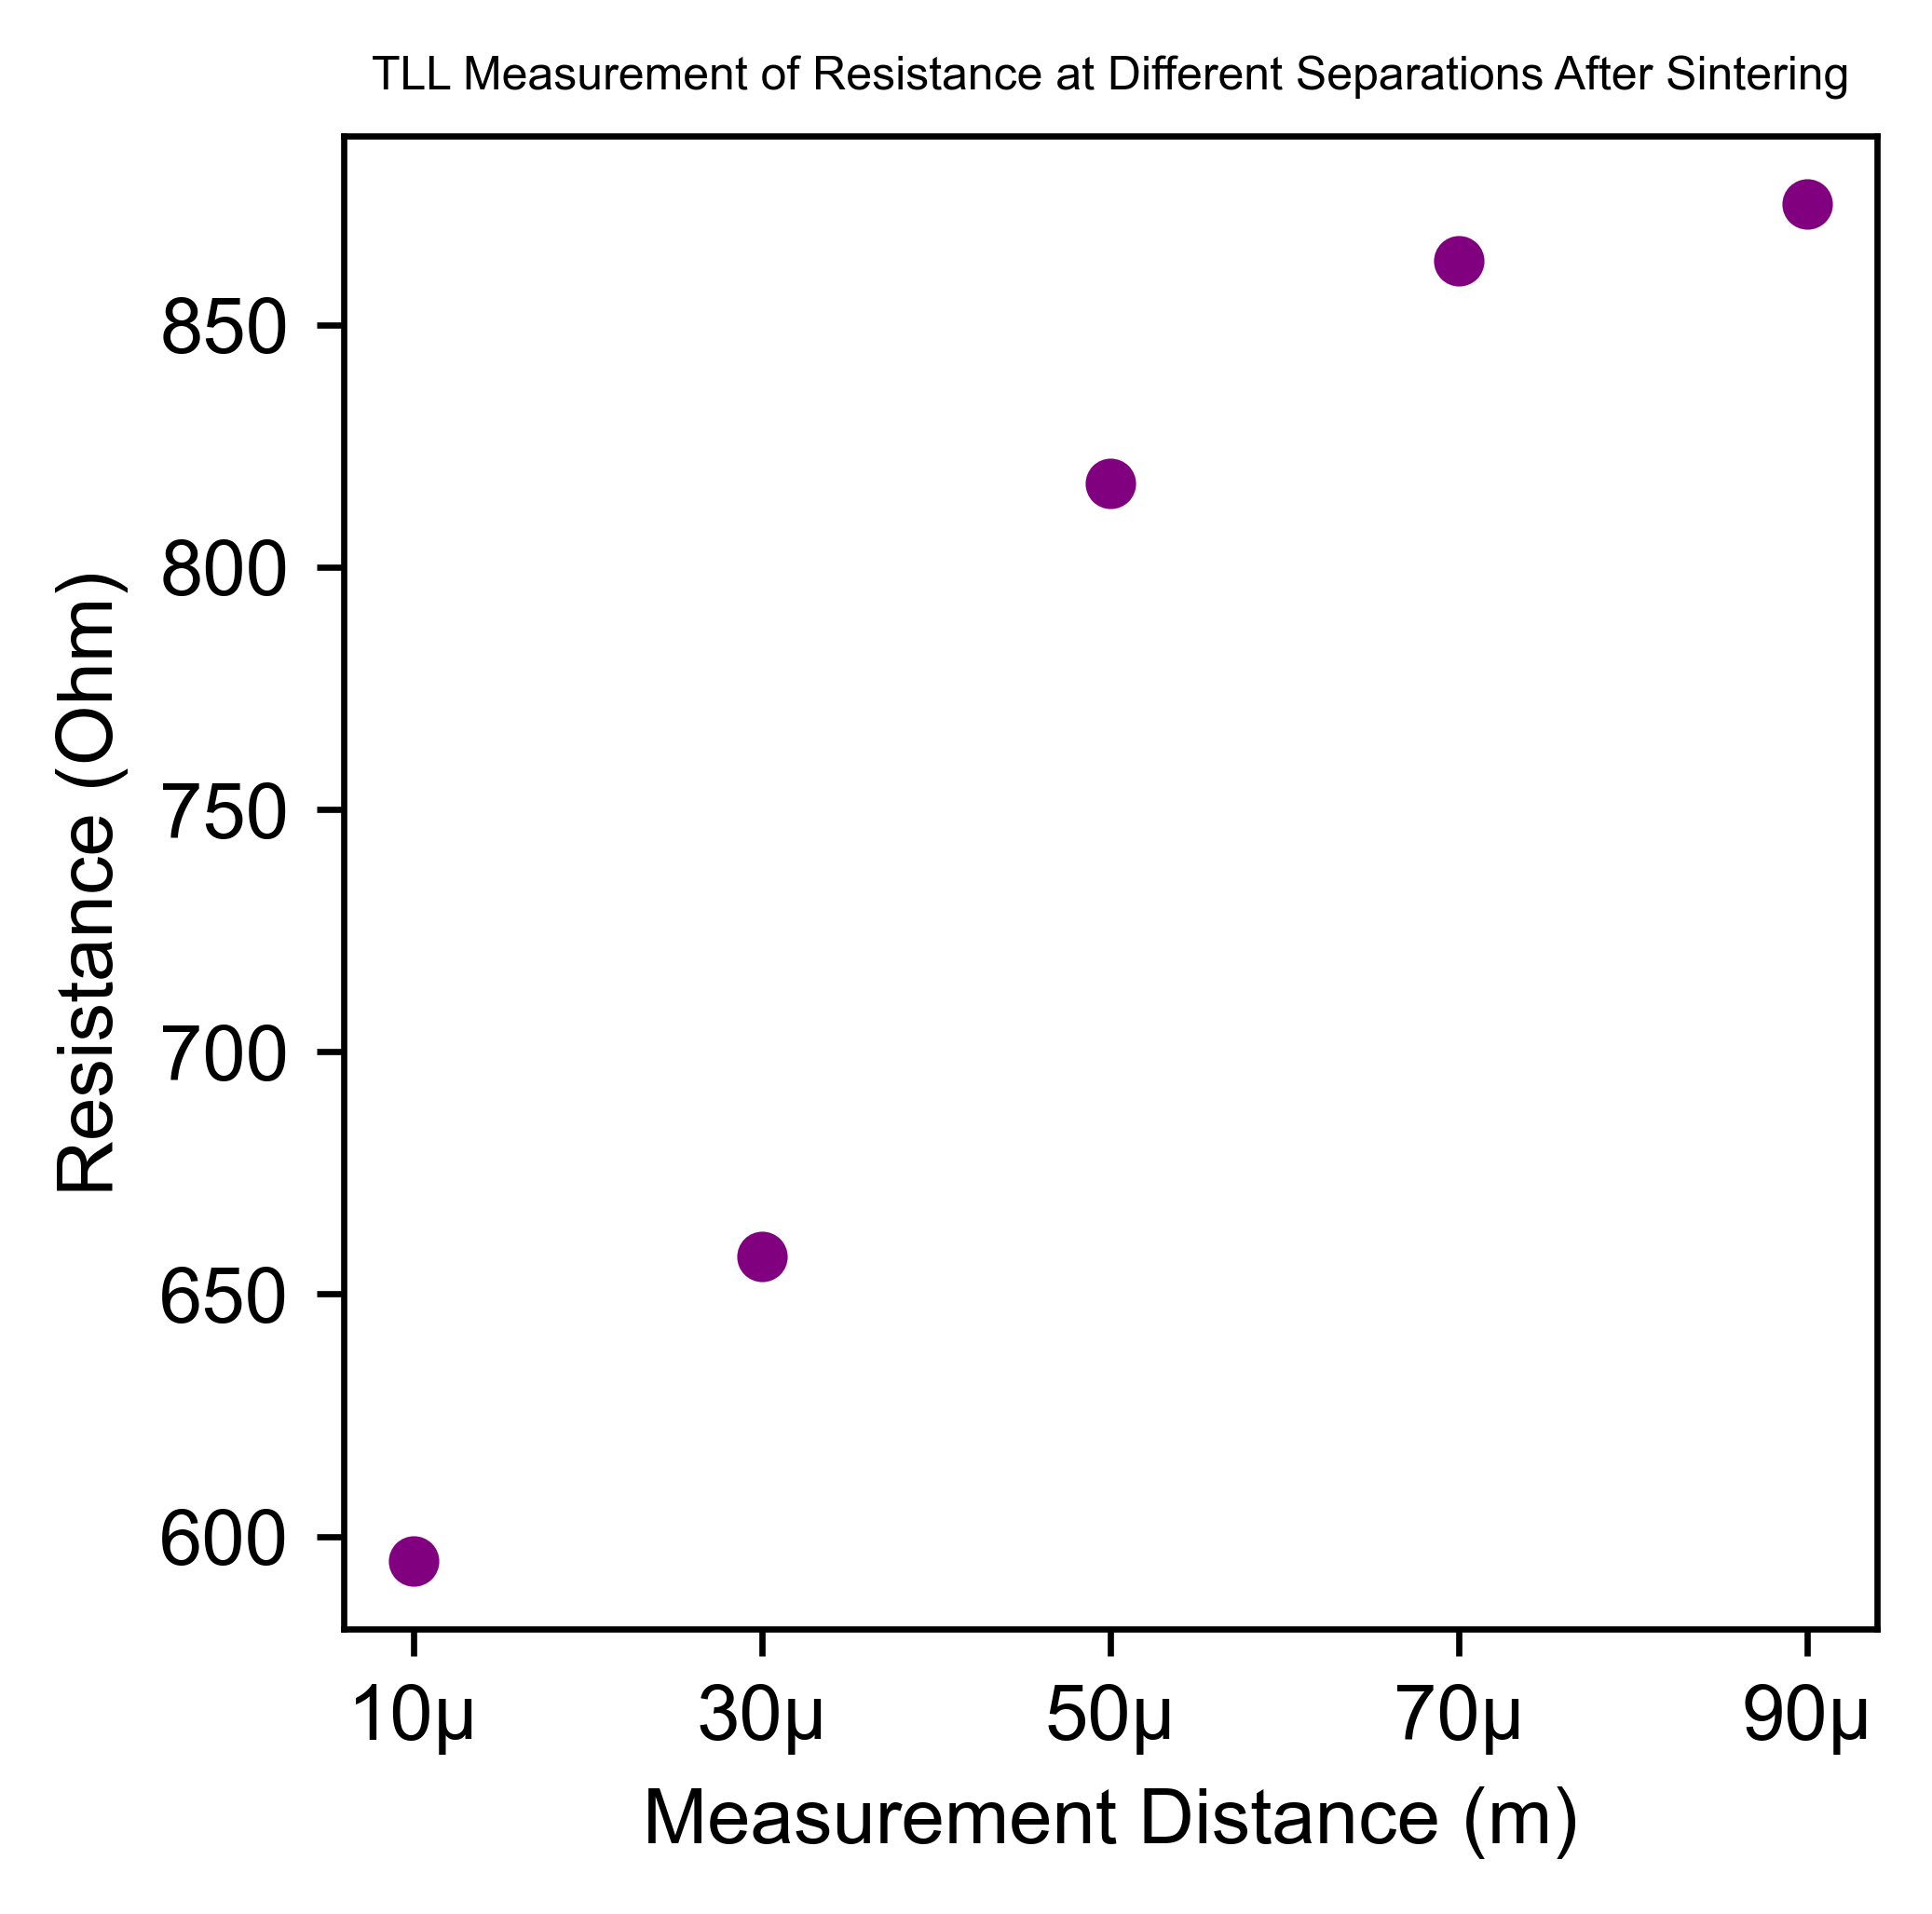

In [86]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(3.54,3.54), dpi=600)

plt.ylabel('Resistance (Ohm)', fontsize=10)
plt.xlabel('Measurement Distance (m)', fontsize=10)
plt.title('TLL Measurement of Resistance at Different Separations After Sintering', fontsize=6)
plt.xticks(np.arange(5), ('10µ', '30µ', '50µ', '70µ', '90µ'))

plt.scatter(np.arange(5), [i[60] for i in checkpoint], linewidth=0.5,zorder=1, label = "", color = 'purple')